Водопьян А.О. Кобзарь О.С. Хабибуллин Р.А. 2019 г.

# Вязкость нефти

Источники:
1.     Beggs, H.D. and Robinson, J.R. “Estimating the Viscosity of Crude Oil Systems.”
        Journal of Petroleum Technology. Vol. 27, No. 9 (1975)
2.     Vazquez M. et al. Correlations for fluid physical property prediction //SPE Annual Fall Technical Conference and Exhibition. – Society of Petroleum Engineers, 1977.

## Общие принципы 

Корреляции для вязкостей были получены с помощью анализа большого объема лабораторных исследований. Для получения готовых формул соблюдалось два взаимо противоположных стремления: охватить корреляцией наиболее большое количество разных нефтей и при этом получить приемлемую точность корреляции.

Вязкость нефти условно делится на 3 типа:

1. Вязкость дегазированной нефти - dead oil viscosity.
2. Вязкость нефти при давлении меньшем, чем давление насыщения - saturated oil viscosity 
3. Вязкость нефти при давлении большем, чем давление насыщения - undersaturated oil viscosity

Для каждой вязкости своя корреляция, причем обычно следующий тип вязкости основывается на предыдущем при увеличении давлении от атмосферного.

Undersaturated oil viscosity, в инностранной литературе, "недонасыщенная нефть". Дело в том, что при давлении большем, чем давление насыщения, дополнительное количество газа может растворится в нефти, однако весь доступный газ уже растворился при давлении насыщения. 

## Вязкость дегазированной нефти [1] 
$$ \mu_{OD} = 10^X - 1 $$

где:

$$ X = yT^{-1.163} $$

$$ y = 10 ^ Z $$

$$ Z = 3.0324 - 0.02023 \gamma_o $$


## Вязкость нефти, содержащей растворенный газ ($P \leq P_b$) [1]

$$\mu = A \mu_{OD}^B$$

где:

$$A = 10.715(R_s + 100)^{-0.515}$$

$$B = 5.44(R_s + 150)^{-0.338}$$


### Номенклатура:

$R_s$ - газосодержание, $scf/STB$

$T$ - температура, $^{\circ} F$

$\mu_{OD}$ - вязкость дегазированной нефти при данной $T$, сПуаз

$\mu$ - вязкость газонасыщенной нефти при данной $T$, сПуаз

$\gamma_o $ - плотность нефти,  $^{\circ} API$


## Вязкость нефти, содержащей растворенный газ ($P > P_b$) [2]

$$\mu_o = \mu_{ob}(p/p_b)^m$$
где: 
$$ m = C_1p^{C_2} exp(C_3 + C_4 p ) $$
а коэффициенты равны:

$C_1 = 2.6$

$C_2 = 1.178$

$C_3 = -11.513$

$C_4 = -8.98 \times 10^{-5}$




In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
import uniflocpy.uPVT.PVT_fluids as PVT_fluids
%matplotlib inline

In [2]:
def show_example(legend, title, xlabel, ylabel):
    plt.grid(True)
    plt.title(title, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xlabel(xlabel, color='black')
    plt.legend(legend)
    plt.show()

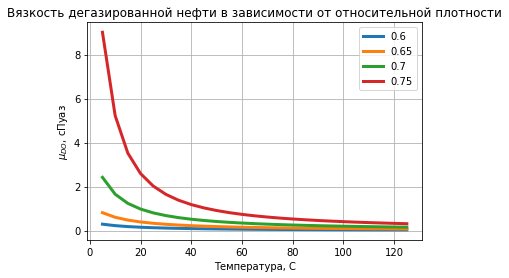

In [3]:
list_t_k = np.arange(278.15,400,5)
list_t_c = list_t_k - 273.15
list_gamma_oil = [0.6, 0.65, 0.7, 0.75]

for sensivity_parametr in list_gamma_oil:
    mu_do_cp = PVTcorr.unf_deadoilviscosity_Beggs_cP(sensivity_parametr, list_t_k)
    plt.plot(list_t_c, mu_do_cp, linewidth=3)

show_example(list_gamma_oil,'Вязкость дегазированной нефти в зависимости от относительной плотности', 
             'Температура, C', '$\mu_{DO}$, сПуаз' )

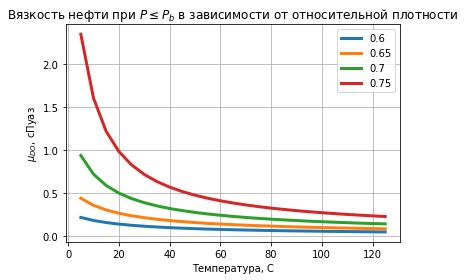

In [4]:
list_rs_m3m3 = np.arange(0, 500, 10)
rs_m3m3 = 50 
for sensivity_parametr in list_gamma_oil:
    mu_do_cp = PVTcorr.unf_deadoilviscosity_Beggs_cP(sensivity_parametr, list_t_k)
    mu_cp = PVTcorr.unf_saturatedoilviscosity_Beggs_cP(mu_do_cp, rs_m3m3)
    plt.plot(list_t_c, mu_cp, linewidth=3)

show_example(list_gamma_oil,'Вязкость нефти при $P \leq P_b$ в зависимости от относительной плотности', 
             'Температура, C', '$\mu_{DO}$, сПуаз' )

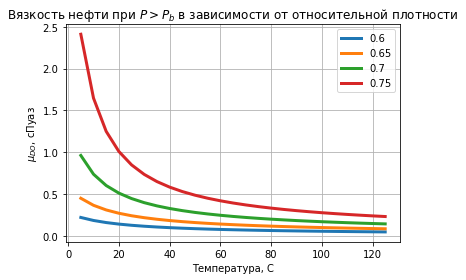

In [5]:
list_rs_m3m3 = np.arange(0, 500, 10)
rs_m3m3 = 50 
p_MPaa = 10
pb_MPaa = 8 
for sensivity_parametr in list_gamma_oil:
    mu_do_cp = PVTcorr.unf_deadoilviscosity_Beggs_cP(sensivity_parametr, list_t_k)
    mu_cp = PVTcorr.unf_saturatedoilviscosity_Beggs_cP(mu_do_cp, rs_m3m3)
    mu_cp_p = PVTcorr.unf_undersaturatedoilviscosity_VB_cP(p_MPaa, pb_MPaa, mu_cp)
    plt.plot(list_t_c, mu_cp_p, linewidth=3)

show_example(list_gamma_oil,'Вязкость нефти при $P > P_b$ в зависимости от относительной плотности', 
             'Температура, C', '$\mu_{DO}$, сПуаз' )

In [6]:
rsb_labels = ('400', '200', '50')
fluid_Standing_1 = PVT_fluids.FluidStanding(rsb_m3m3 = 400)
fluid_Standing_2 = PVT_fluids.FluidStanding(rsb_m3m3 = 200)
fluid_Standing_3 = PVT_fluids.FluidStanding(rsb_m3m3 = 50)
p_bar = range(1,700)
t_c = 80
mu_oil_1 = []
mu_oil_2 = []
mu_oil_3 = []
for i in p_bar:
    fluid_Standing_1.calc(i, t_c)
    fluid_Standing_2.calc(i, t_c)
    fluid_Standing_3.calc(i, t_c)
    mu_oil_1.append(fluid_Standing_1.mu_oil_cP)
    mu_oil_2.append(fluid_Standing_2.mu_oil_cP)
    mu_oil_3.append(fluid_Standing_3.mu_oil_cP)
    

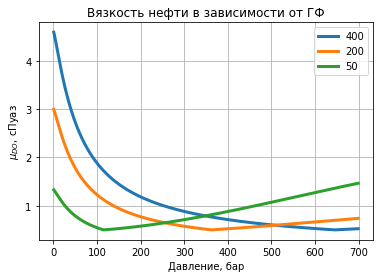

In [7]:
plt.plot(p_bar, mu_oil_1, linewidth=3)
plt.plot(p_bar, mu_oil_2, linewidth=3)
plt.plot(p_bar, mu_oil_3, linewidth=3)
show_example(rsb_labels,'Вязкость нефти в зависимости от ГФ', 
             'Давление, бар', '$\mu_{DO}$, сПуаз' )